In [1]:
import os
import shutil
import numpy as np
import gpflow as gpf
import tensorflow as tf
import sklearn.preprocessing as pp

In [2]:
import sys
sys.path.append('../')

import gprmachine as gpm

### Pendulum_1

In [3]:
example = 'Pendulum'
target = 0
n_start = 0
n_train = 50
n_test = 30
noise_level = 0.0
n_task = 5
n_iter = 80
k_low_list = [0.5] * n_test
k_up_list = [k+0.1 for k in k_low_list]

In [4]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

In [5]:
rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

In [6]:
DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

In [7]:
trainer = gpm.train.MultipleTrainer()

mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [8]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='ticks', font_scale=1.2)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

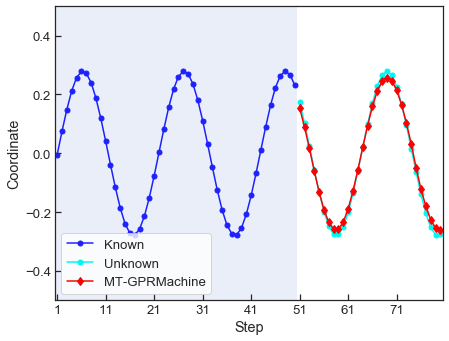

In [16]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(-.5, .5)
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(np.arange(1, 80 + 1, 10))
ax.set_xlim(-.5, 80 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()

In [13]:
res_file = f'{example}_{target+1}_T{n_task}_N{noise_level}_S{seed}.txt'
np.savetxt(res_file, pred)

### Pendulum_2

In [17]:
example = 'Pendulum'
target = 1
n_start = 0
n_train = 50
n_test = 30
noise_level = 0.0
n_task = 5
n_iter = 80
k_low_list = [0.5] * n_test
k_up_list = [k+0.1 for k in k_low_list]

rdata = np.loadtxt('../data/{}.txt'.format(example))

rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

trainer = gpm.train.MultipleTrainer()
mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [20]:
res_file = f'{example}_{target+1}_T{n_task}_N{noise_level}_S{seed}.txt'
np.savetxt(res_file, pred)

In [18]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

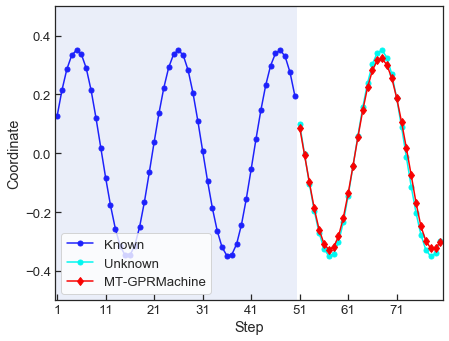

In [26]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(-.5, .5)
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(np.arange(1, 80 + 1, 10))
ax.set_xlim(-.5, 80 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()

### Pendulum_3

In [23]:
rdata[:,1]

array([0.12658339, 0.21474366, 0.28552767, ..., 0.33751064, 0.35092198,
       0.33131056])

In [27]:
example = 'Pendulum'
target = 2
n_start = 0
n_train = 50
n_test = 30
noise_level = 0.0
n_task = 5
n_iter = 80
k_low_list = [0.5] * n_test
k_up_list = [k+0.1 for k in k_low_list]

rdata = np.loadtxt('../data/{}.txt'.format(example))

rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

trainer = gpm.train.MultipleTrainer()
mu_list, var_list, mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [28]:
res_file = f'{example}_{target+1}_T{n_task}_N{noise_level}_S{seed}.txt'
np.savetxt(res_file, pred)

In [29]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

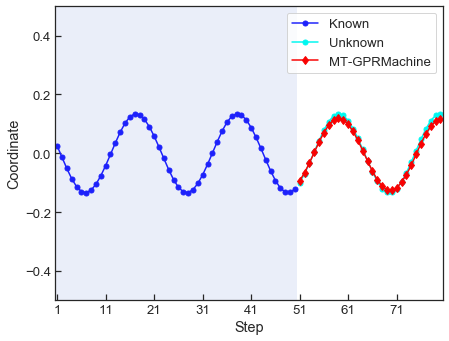

In [32]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(-.5, .5)
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(np.arange(1, 80 + 1, 10))
ax.set_xlim(-.5, 80 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()